This notebook explains the pipeline for long axis

In [1]:
from utils import *
import os

Set the data path to the folder that contains directories named after patient ids and MRI vids

In [2]:
DATA_PATH = "demo_image"
image_path = "demo_image/2/la_4ch.nii.gz"
seg_image_path = "demo_image/2/seg4_la_4ch.nii.gz"

# Download your dicom files and convert to nifti

In [3]:
#convert_zip_to_nifti(patients_csv = "/workspace/Milos/TestNifti/patients.csv",  
#                         data_root = "/workspace/Milos/TestNifti/",
#                         output_dir = "/workspace/Milos/UKBB_nifti",
#                         start=0,
#                         end=10000):

In [4]:
nim = nib.load(image_path)
image = nim.get_fdata()
seg_image = np.zeros_like(image)
create_video(image,seg_image,cut=0)

C:\tools\miniconda3\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\tools\miniconda3\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([vmin, vmax], dtype=scaled_dtype)


# Segment Nifti files

specify absolute path of your dir

In [5]:
%%capture
%cd ukbb_cardiac
!bash -i segment.rc ../demo_image/
%cd ..

In [6]:
nim = nib.load(image_path)
image = nim.get_fdata()
seg_nim = nib.load(seg_image_path)
seg_image = seg_nim.get_fdata()

In [7]:
create_lv_seg_video(image,seg_image,cut=0)

# Find ED Frame

In [8]:
# find the frame where segmentation mask is the biggest
ed_frame_id = np.argmax(np.sum(np.sum(np.squeeze(seg_image==1),axis=0),axis=0))

In [9]:
image_ED = image.squeeze()[:,:,ed_frame_id]
seg_image_ED = seg_image.squeeze()[:,:,ed_frame_id]

# Extract Sphericity Index

In [10]:
from utils import extract_si
from utils import overlap_mask

In [11]:
res_img, mask, si = extract_si(image_ED, seg_image_ED)

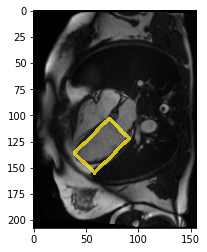

In [12]:
overlap_mask(res_img, mask)

In [13]:
print(f"Sphericity Index is {si}") 

Sphericity Index is 0.575757668643206


# Downstream analyses

Now that we have tools to extract the sphericity index, we can run it on the full dataset (in UKB ~50k) and proceed with running downstream analyses: PheWAS, Cox, GWAS, genetic correlation and mendelian randomization